In [1]:
# Importando as bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [ ]:
# Carregar os dados
df = pd.read_csv('basededados/monitoramento_tempo.csv')

# Visualizar informações básicas
print("Informações do dataset:")
print(df.info())
print("\nPrimeiras 5 linhas:")
print(df.head())

# Converter coluna de data para datetime
df['data'] = pd.to_datetime(df['Data'])

# Extrair ano da data
df['ano'] = df['data'].dt.year

print(f"\nPeríodo dos dados: {df['ano'].min()} a {df['ano'].max()}")
print(f"Total de registros: {len(df)}")

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperatura          45253 non-null  float64
 1   Pressão              45253 non-null  float64
 2   Umidade              45253 non-null  float64
 3   Direção do Vento     45253 non-null  float64
 4   Velocidade do Vento  45253 non-null  float64
 5   Dia Da Semana        45253 non-null  object 
 6   Data                 45253 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB
None

Primeiras 5 linhas:
   Temperatura  Pressão  Umidade  Direção do Vento  Velocidade do Vento  \
0   282.080000   1024.0     81.0               0.0                  0.0   
1   282.080000   1024.0     81.0               0.0                  0.0   
2   282.083252   1024.0     80.0               4.0                  0.0   
3   282.091866   1024.0     80.0        

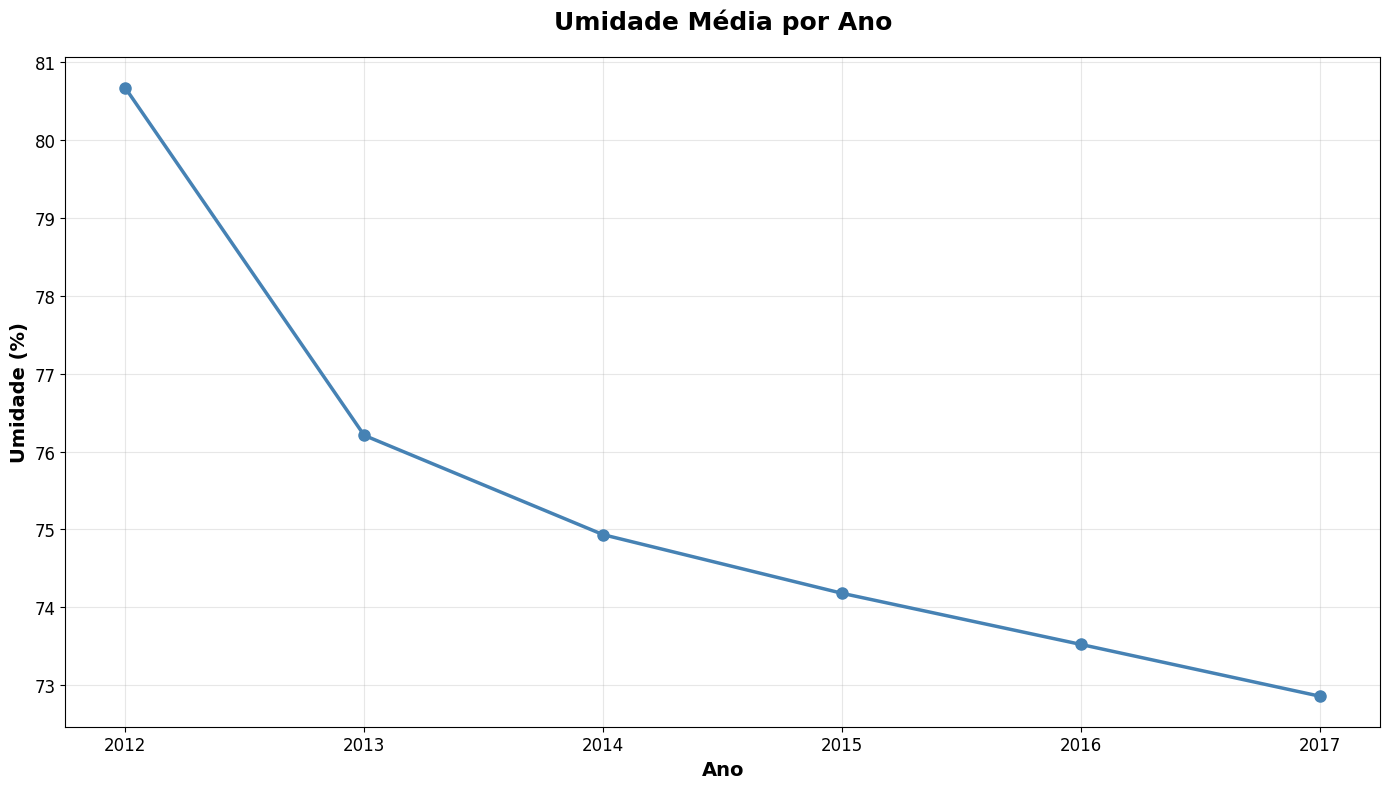

In [10]:
# Calcular umidade média por ano
umidade_por_ano = df.groupby('ano')['Umidade'].mean()

# Criar o gráfico
plt.figure(figsize=(14, 8))
plt.plot(umidade_por_ano.index, umidade_por_ano.values, 
         marker='o', linewidth=2.5, markersize=8, color='steelblue')

plt.title('Umidade Média por Ano', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Ano', fontsize=14, fontweight='bold')
plt.ylabel('Umidade (%)', fontsize=14, fontweight='bold')

# Personalização
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

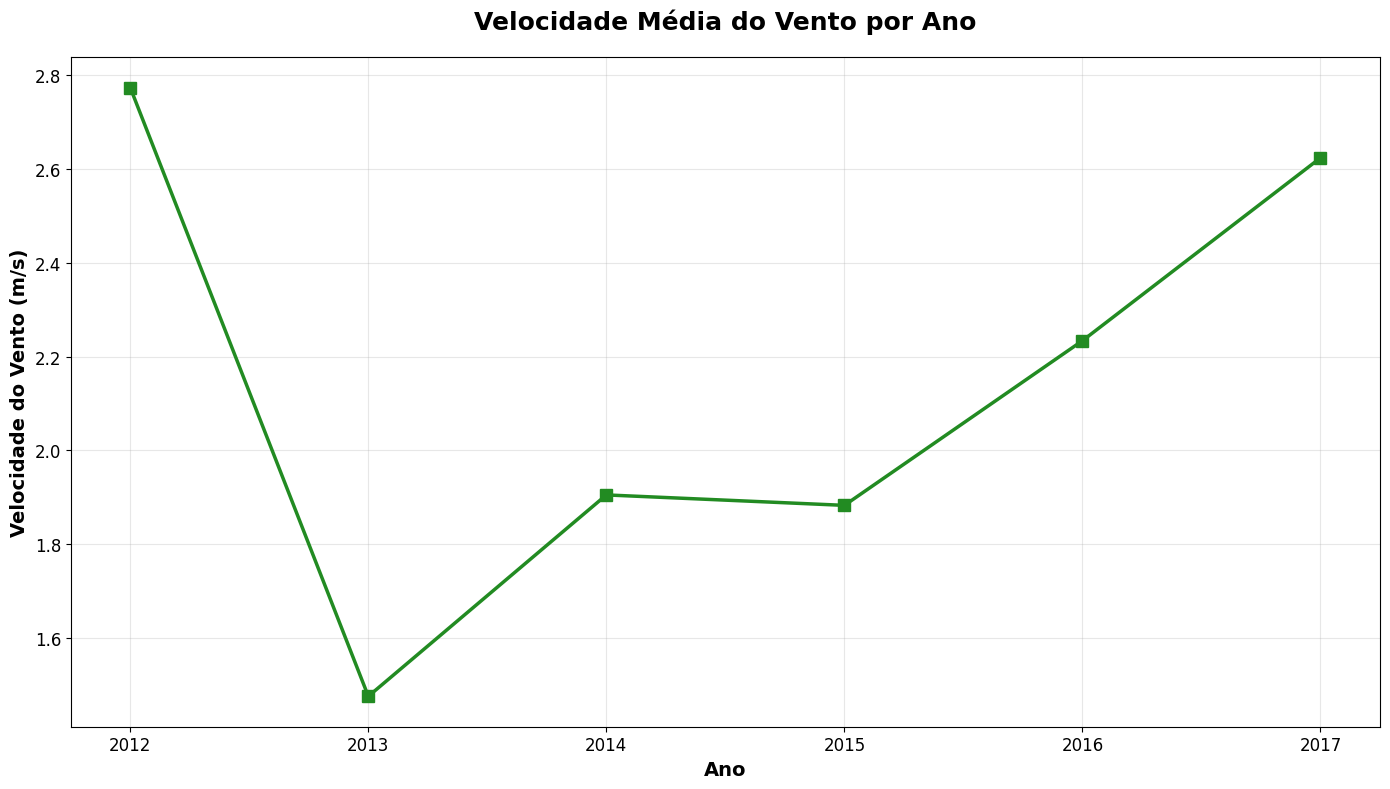

In [12]:
# Calcular velocidade média do vento por ano
velocidade_por_ano = df.groupby('ano')['Velocidade do Vento'].mean()

# Criar o gráfico
plt.figure(figsize=(14, 8))
plt.plot(velocidade_por_ano.index, velocidade_por_ano.values, 
         marker='s', linewidth=2.5, markersize=8, color='forestgreen')

plt.title('Velocidade Média do Vento por Ano', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Ano', fontsize=14, fontweight='bold')
plt.ylabel('Velocidade do Vento (m/s)', fontsize=14, fontweight='bold')

# Personalização
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

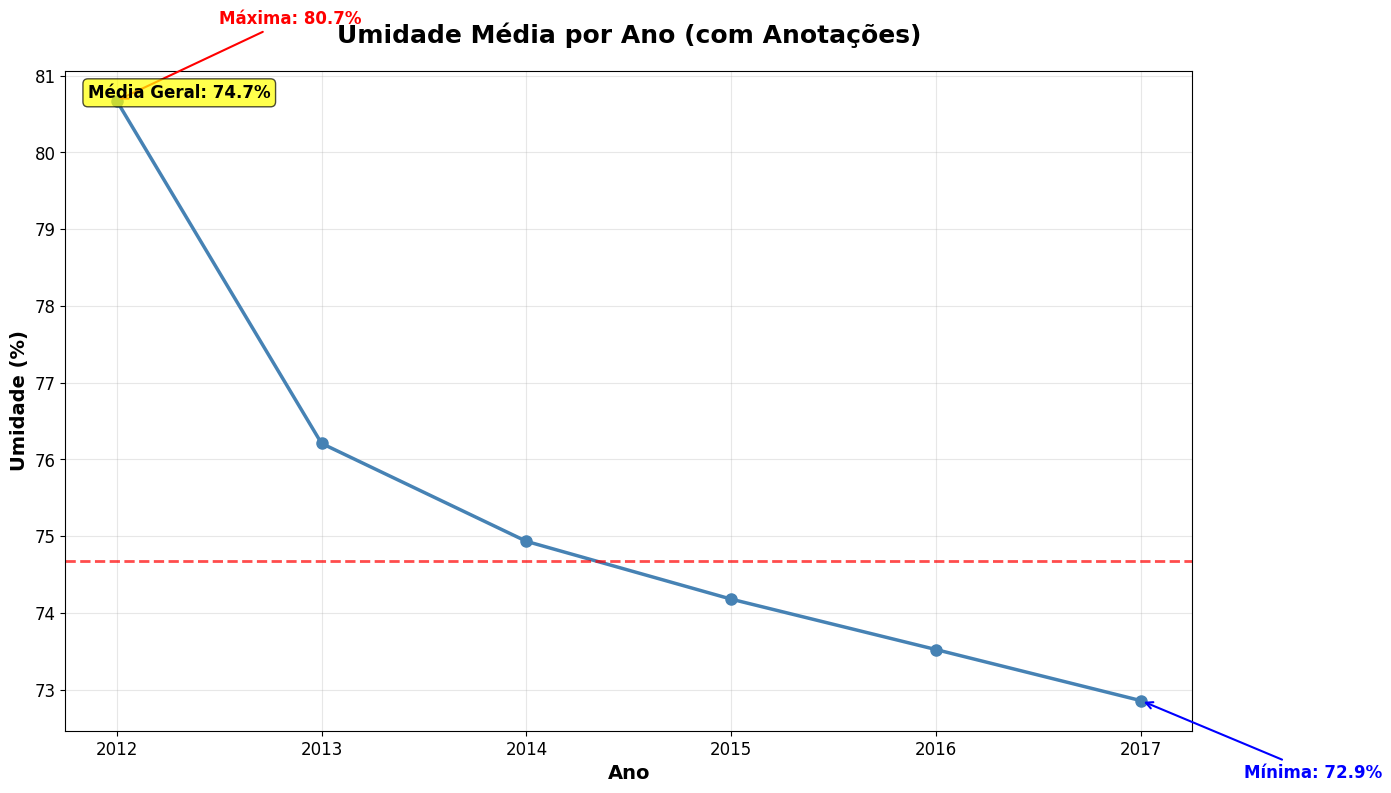

In [13]:
# Calcular estatísticas para anotações
umidade_max_ano = umidade_por_ano.idxmax()
umidade_max_valor = umidade_por_ano.max()
umidade_min_ano = umidade_por_ano.idxmin()
umidade_min_valor = umidade_por_ano.min()
umidade_media_geral = df['Umidade'].mean()

plt.figure(figsize=(14, 8))
plt.plot(umidade_por_ano.index, umidade_por_ano.values, 
         marker='o', linewidth=2.5, markersize=8, color='steelblue')

# Adicionar linha de média geral
plt.axhline(y=umidade_media_geral, color='red', linestyle='--', alpha=0.7, linewidth=2)

# Anotações
plt.annotate(f'Máxima: {umidade_max_valor:.1f}%', 
             xy=(umidade_max_ano, umidade_max_valor), 
             xytext=(umidade_max_ano+0.5, umidade_max_valor+1),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=12, fontweight='bold', color='red')

plt.annotate(f'Mínima: {umidade_min_valor:.1f}%', 
             xy=(umidade_min_ano, umidade_min_valor), 
             xytext=(umidade_min_ano+0.5, umidade_min_valor-1),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=12, fontweight='bold', color='blue')

plt.text(0.02, 0.98, f'Média Geral: {umidade_media_geral:.1f}%', 
         transform=plt.gca().transAxes, fontsize=12, fontweight='bold',
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.title('Umidade Média por Ano (com Anotações)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Ano', fontsize=14, fontweight='bold')
plt.ylabel('Umidade (%)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

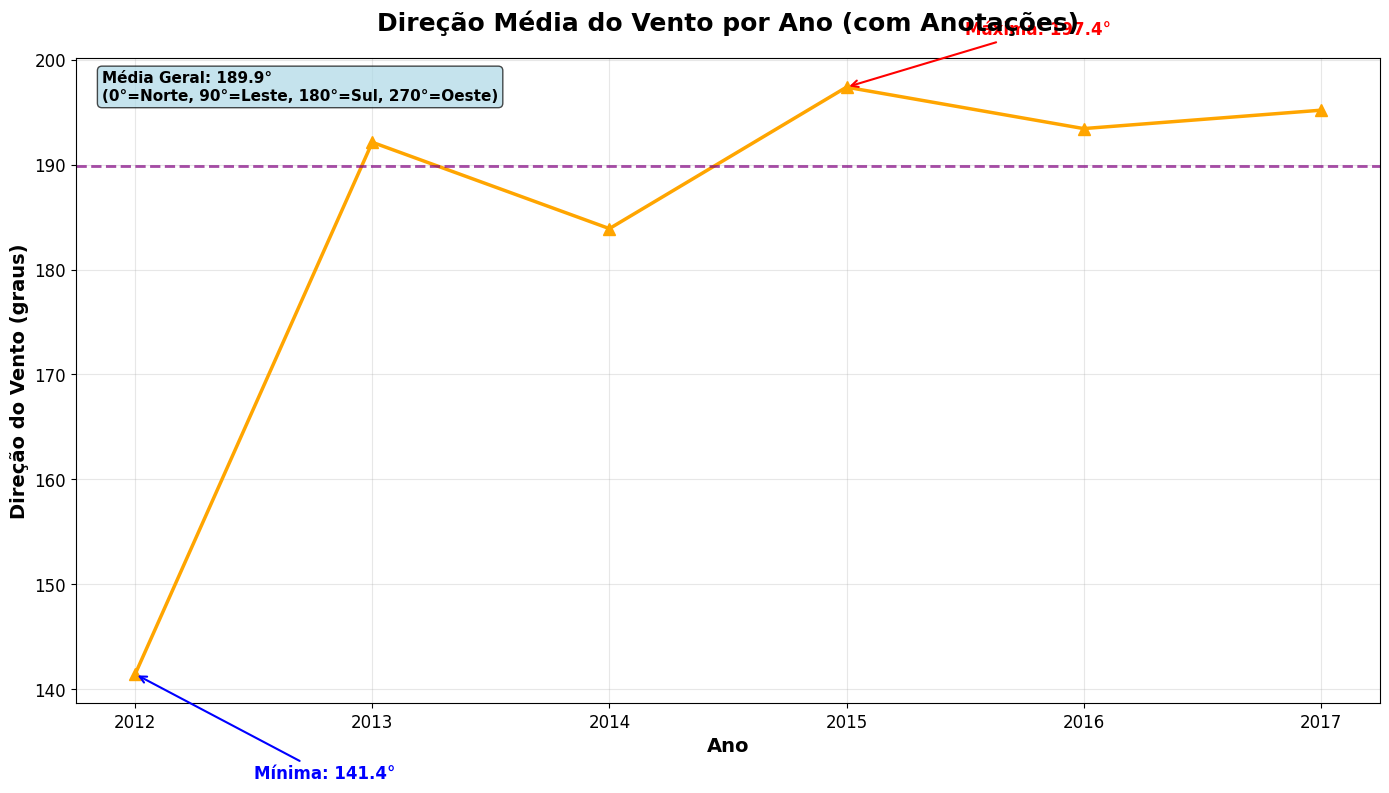

In [16]:
# Calcular direção média do vento por ano
direcao_por_ano = df.groupby('ano')['Direção do Vento'].mean()

# Estatísticas para anotações
direcao_max_ano = direcao_por_ano.idxmax()
direcao_max_valor = direcao_por_ano.max()
direcao_min_ano = direcao_por_ano.idxmin()
direcao_min_valor = direcao_por_ano.min()
direcao_media_geral = df['Direção do Vento'].mean()

plt.figure(figsize=(14, 8))
plt.plot(direcao_por_ano.index, direcao_por_ano.values, 
         marker='^', linewidth=2.5, markersize=8, color='orange')

# Linha de média
plt.axhline(y=direcao_media_geral, color='purple', linestyle='--', alpha=0.7, linewidth=2)

# Anotações
plt.annotate(f'Máxima: {direcao_max_valor:.1f}°', 
             xy=(direcao_max_ano, direcao_max_valor), 
             xytext=(direcao_max_ano+0.5, direcao_max_valor+5),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=12, fontweight='bold', color='red')

plt.annotate(f'Mínima: {direcao_min_valor:.1f}°', 
             xy=(direcao_min_ano, direcao_min_valor), 
             xytext=(direcao_min_ano+0.5, direcao_min_valor-10),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=12, fontweight='bold', color='blue')

# Adicionar informação sobre direções cardeais
plt.text(0.02, 0.98, f'Média Geral: {direcao_media_geral:.1f}°\n(0°=Norte, 90°=Leste, 180°=Sul, 270°=Oeste)', 
         transform=plt.gca().transAxes, fontsize=11, fontweight='bold',
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

plt.title('Direção Média do Vento por Ano (com Anotações)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Ano', fontsize=14, fontweight='bold')
plt.ylabel('Direção do Vento (graus)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

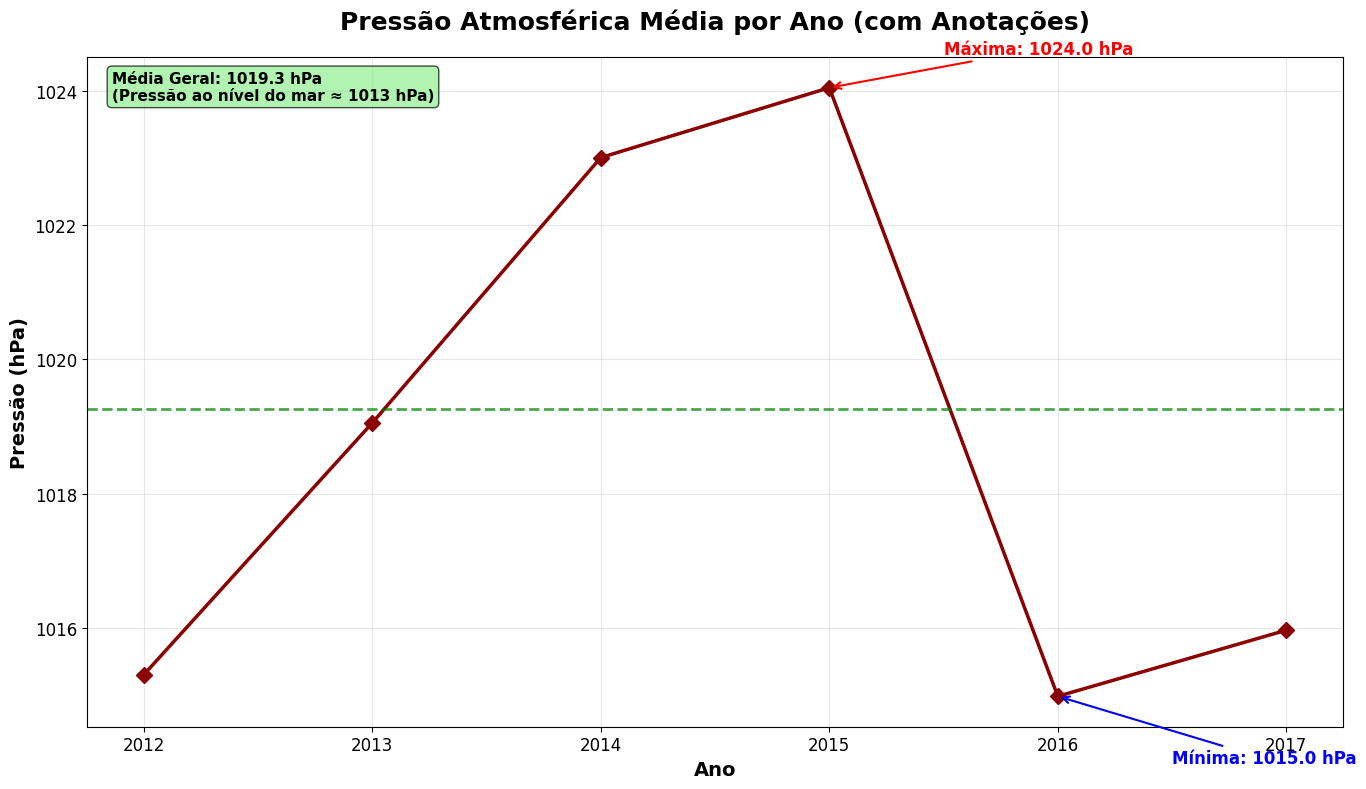

In [17]:
# Calcular pressão média por ano
pressao_por_ano = df.groupby('ano')['Pressão'].mean()

# Estatísticas para anotações
pressao_max_ano = pressao_por_ano.idxmax()
pressao_max_valor = pressao_por_ano.max()
pressao_min_ano = pressao_por_ano.idxmin()
pressao_min_valor = pressao_por_ano.min()
pressao_media_geral = df['Pressão'].mean()

plt.figure(figsize=(14, 8))
plt.plot(pressao_por_ano.index, pressao_por_ano.values, 
         marker='D', linewidth=2.5, markersize=8, color='darkred')

# Linha de média
plt.axhline(y=pressao_media_geral, color='green', linestyle='--', alpha=0.7, linewidth=2)

# Anotações
plt.annotate(f'Máxima: {pressao_max_valor:.1f} hPa', 
             xy=(pressao_max_ano, pressao_max_valor), 
             xytext=(pressao_max_ano+0.5, pressao_max_valor+0.5),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=12, fontweight='bold', color='red')

plt.annotate(f'Mínima: {pressao_min_valor:.1f} hPa', 
             xy=(pressao_min_ano, pressao_min_valor), 
             xytext=(pressao_min_ano+0.5, pressao_min_valor-1),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=12, fontweight='bold', color='blue')

# Adicionar informação sobre pressão atmosférica
plt.text(0.02, 0.98, f'Média Geral: {pressao_media_geral:.1f} hPa\n(Pressão ao nível do mar ≈ 1013 hPa)', 
         transform=plt.gca().transAxes, fontsize=11, fontweight='bold',
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.title('Pressão Atmosférica Média por Ano (com Anotações)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Ano', fontsize=14, fontweight='bold')
plt.ylabel('Pressão (hPa)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

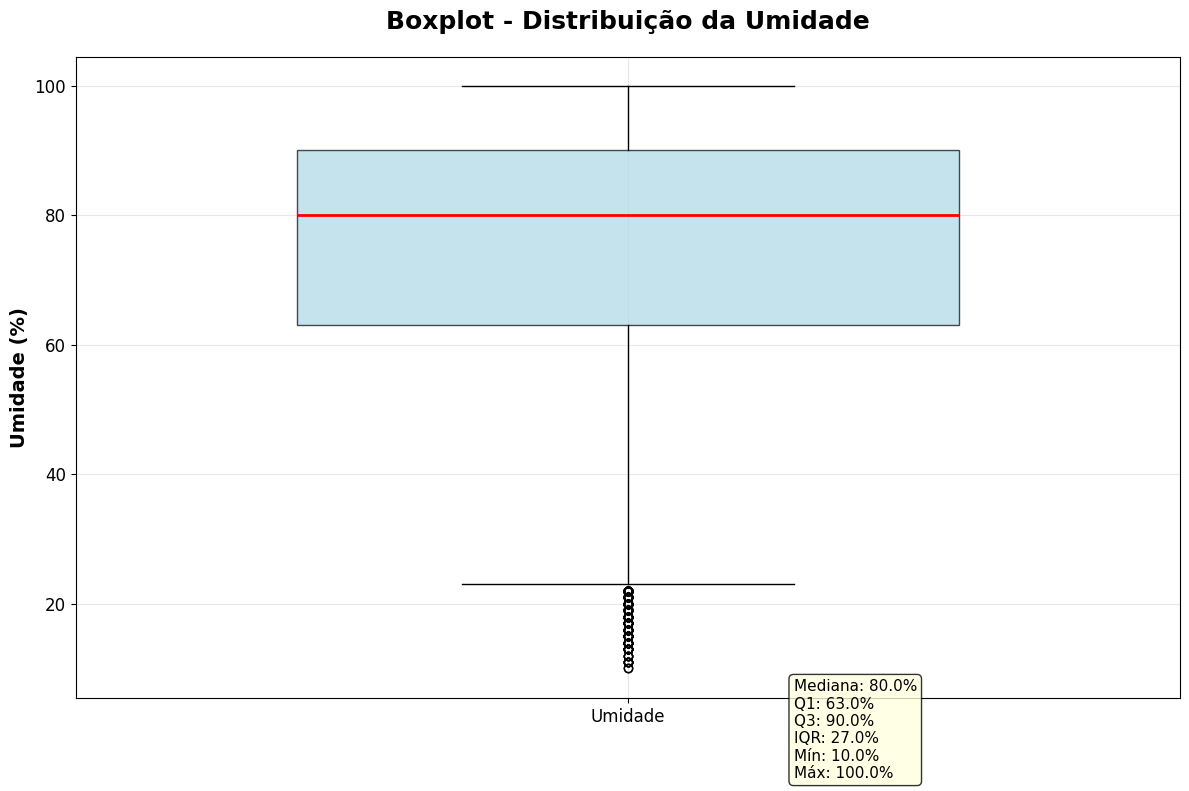

In [20]:
plt.figure(figsize=(12, 8))

# Criar boxplot
box_plot = plt.boxplot(df['Umidade'], patch_artist=True, widths=0.6)

# Personalizar cores
box_plot['boxes'][0].set_facecolor('lightblue')
box_plot['boxes'][0].set_alpha(0.7)
box_plot['medians'][0].set_color('red')
box_plot['medians'][0].set_linewidth(2)

# Calcular estatísticas
q1 = df['Umidade'].quantile(0.25)
q3 = df['Umidade'].quantile(0.75)
mediana = df['Umidade'].median()
minimo = df['Umidade'].min()
maximo = df['Umidade'].max()
iqr = q3 - q1

plt.title('Boxplot - Distribuição da Umidade', fontsize=18, fontweight='bold', pad=20)
plt.ylabel('Umidade (%)', fontsize=14, fontweight='bold')
plt.xticks([1], ['Umidade'], fontsize=12)
plt.yticks(fontsize=12)

# Adicionar estatísticas como texto
stats_text = f'Mediana: {mediana:.1f}%\nQ1: {q1:.1f}%\nQ3: {q3:.1f}%\nIQR: {iqr:.1f}%\nMín: {minimo:.1f}%\nMáx: {maximo:.1f}%'
plt.text(1.15, 0.5, stats_text, transform=plt.gca().transData, fontsize=11,
         verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

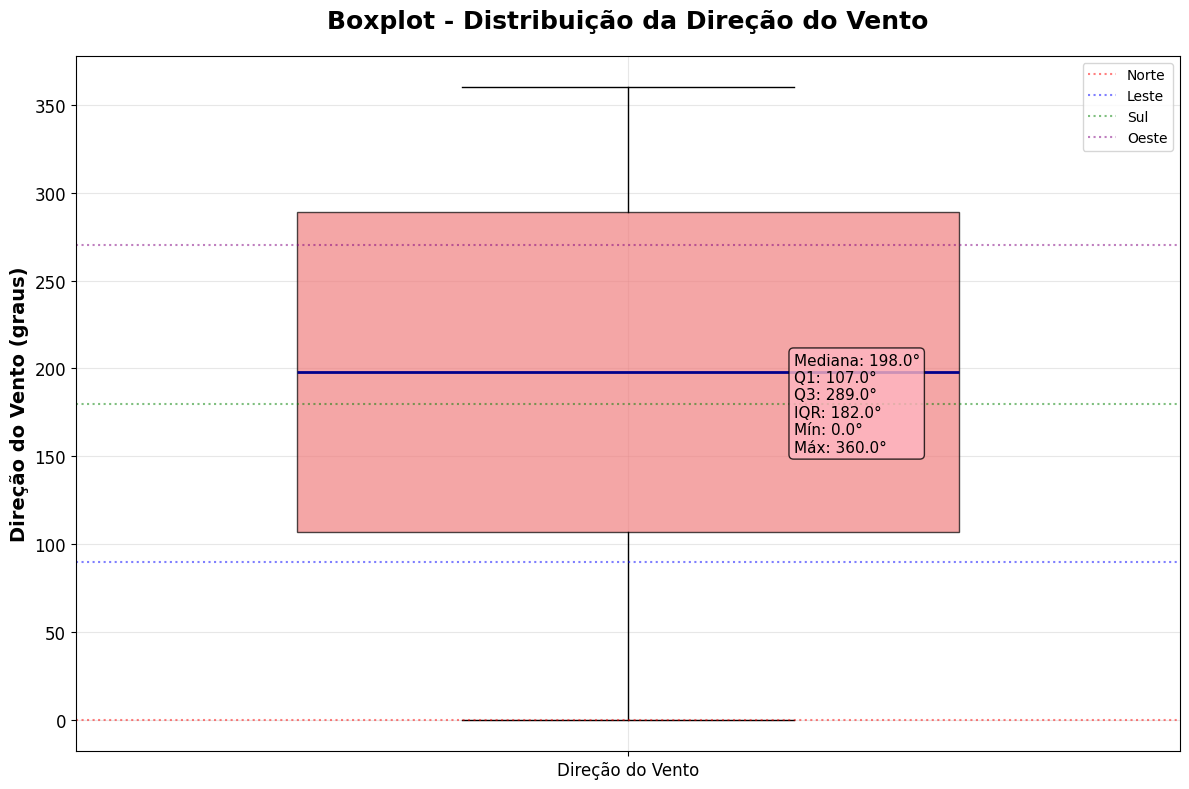

In [22]:
plt.figure(figsize=(12, 8))

# Criar boxplot
box_plot = plt.boxplot(df['Direção do Vento'], patch_artist=True, widths=0.6)

# Personalizar cores
box_plot['boxes'][0].set_facecolor('lightcoral')
box_plot['boxes'][0].set_alpha(0.7)
box_plot['medians'][0].set_color('darkblue')
box_plot['medians'][0].set_linewidth(2)

# Calcular estatísticas
q1 = df['Direção do Vento'].quantile(0.25)
q3 = df['Direção do Vento'].quantile(0.75)
mediana = df['Direção do Vento'].median()
minimo = df['Direção do Vento'].min()
maximo = df['Direção do Vento'].max()
iqr = q3 - q1

plt.title('Boxplot - Distribuição da Direção do Vento', fontsize=18, fontweight='bold', pad=20)
plt.ylabel('Direção do Vento (graus)', fontsize=14, fontweight='bold')
plt.xticks([1], ['Direção do Vento'], fontsize=12)
plt.yticks(fontsize=12)

# Adicionar linhas de referência para direções cardeais
plt.axhline(y=0, color='red', linestyle=':', alpha=0.5, label='Norte')
plt.axhline(y=90, color='blue', linestyle=':', alpha=0.5, label='Leste')
plt.axhline(y=180, color='green', linestyle=':', alpha=0.5, label='Sul')
plt.axhline(y=270, color='purple', linestyle=':', alpha=0.5, label='Oeste')

# Adicionar estatísticas como texto
stats_text = f'Mediana: {mediana:.1f}°\nQ1: {q1:.1f}°\nQ3: {q3:.1f}°\nIQR: {iqr:.1f}°\nMín: {minimo:.1f}°\nMáx: {maximo:.1f}°'
plt.text(1.15, 180, stats_text, transform=plt.gca().transData, fontsize=11,
         verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightpink', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

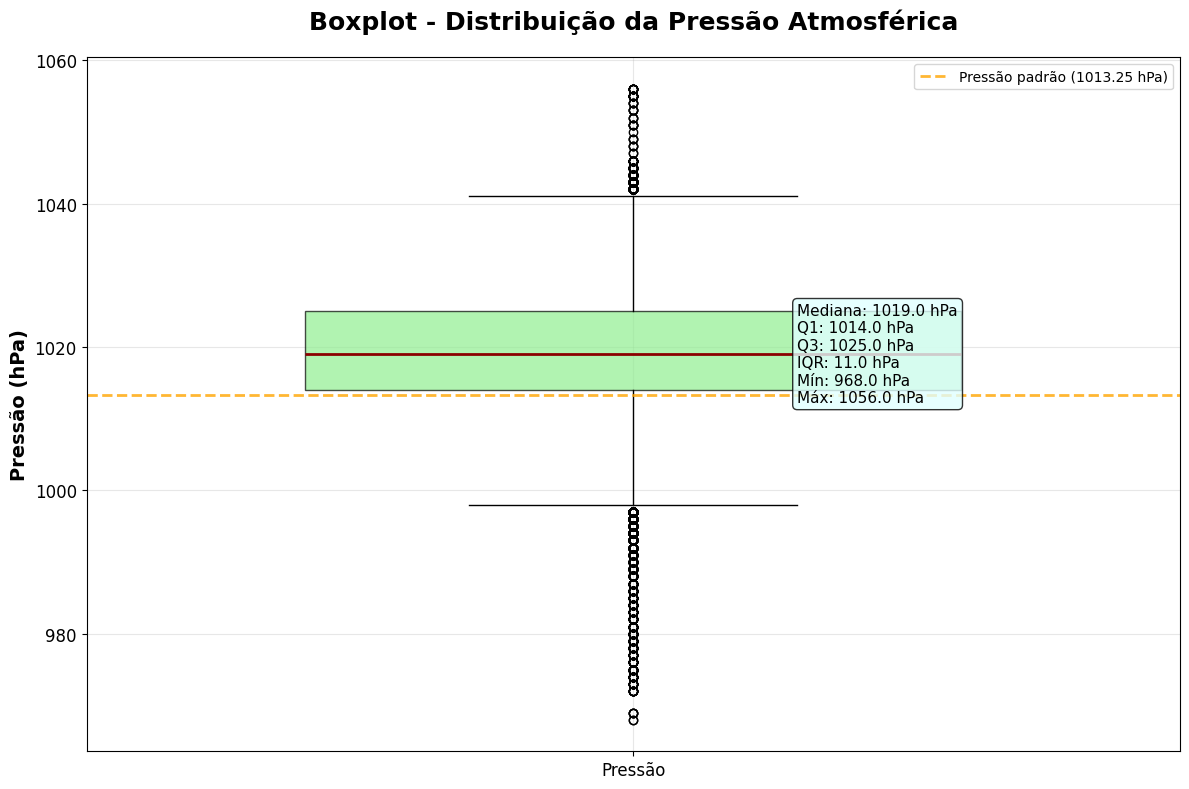

In [24]:
plt.figure(figsize=(12, 8))

# Criar boxplot
box_plot = plt.boxplot(df['Pressão'], patch_artist=True, widths=0.6)

# Personalizar cores
box_plot['boxes'][0].set_facecolor('lightgreen')
box_plot['boxes'][0].set_alpha(0.7)
box_plot['medians'][0].set_color('darkred')
box_plot['medians'][0].set_linewidth(2)

# Calcular estatísticas
q1 = df['Pressão'].quantile(0.25)
q3 = df['Pressão'].quantile(0.75)
mediana = df['Pressão'].median()
minimo = df['Pressão'].min()
maximo = df['Pressão'].max()
iqr = q3 - q1

plt.title('Boxplot - Distribuição da Pressão Atmosférica', fontsize=18, fontweight='bold', pad=20)
plt.ylabel('Pressão (hPa)', fontsize=14, fontweight='bold')
plt.xticks([1], ['Pressão'], fontsize=12)
plt.yticks(fontsize=12)

# Adicionar linha de referência para pressão ao nível do mar
plt.axhline(y=1013.25, color='orange', linestyle='--', alpha=0.8, linewidth=2, label='Pressão padrão (1013.25 hPa)')

# Adicionar estatísticas como texto
stats_text = f'Mediana: {mediana:.1f} hPa\nQ1: {q1:.1f} hPa\nQ3: {q3:.1f} hPa\nIQR: {iqr:.1f} hPa\nMín: {minimo:.1f} hPa\nMáx: {maximo:.1f} hPa'
plt.text(1.15, mediana, stats_text, transform=plt.gca().transData, fontsize=11,
         verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()